# Syn data performance
> coPTR vs aPTR on synthetic dataset

In [2]:
import sys
sys.path.append('/home/phil/aptr')
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# First things first
Are there even any overlaps?

In [39]:
coptr_ptrs = pd.read_csv(
    '../experiments/synthetic/coptr_out/coptr_log2_ptrs.csv', 
    dtype={0: str}
)
coptr_ptrs = coptr_ptrs.set_index('log2(PTR):genome_id/sample_id')
coptr_ptrs = 2**coptr_ptrs

In [58]:
aptr_ptrs = pd.read_csv('../experiments/synthetic/aptr_out_100_nofilter/inferred_ptrs.tsv', sep='\t', dtype={0: str})
aptr_ptrs = aptr_ptrs.set_index('Unnamed: 0')
aptr_ptrs

,SRR2079821,SRR2080619,SRR2080621,SRR2080623,SRR2080624,SRR2080625,SRR2080626,SRR2080627,SRR2080628,SRR2080629,...,SRR2081059,SRR2081060,SRR2081061,SRR2081062,SRR2081064,SRR2081065,SRR2081066,SRR2081067,SRR2081068,SRR2081069
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
479436.6,12.571669,11.448911,11.524969,12.502012,8.287810e-02,2.066598e-13,3.290889e-07,8.613780e-13,1.396995e+00,1.865073e+01,...,10.530795,10.886967,11.577447,5.976382,2.435058e-04,1.232194e-02,2.610917e-01,9.731766e+00,4.356806e+00,9.713507e+00
435590.9,0.975817,0.888863,0.940781,0.231959,1.308606e+10,6.667668e+00,3.773610e-01,1.687321e-01,6.493533e-01,8.202154e+01,...,1.480685,1.172305,1.985356,1.260318,7.326853e+14,5.775096e+14,7.994227e+14,4.323534e+15,4.326636e+15,2.314362e+15
701521.8,10.026966,9.524906,9.574546,9.922831,1.064555e+01,3.022376e+00,9.217650e+00,2.230318e+00,4.978258e+00,1.500196e+01,...,8.649529,9.124948,9.369557,5.389252,7.582364e+00,7.523253e+00,7.408845e+00,8.947343e+00,8.649778e+00,8.563323e+00
637910.3,18.509924,17.158195,17.272758,18.474165,1.764779e+01,5.141986e+00,4.961646e+03,5.428219e+00,4.267023e+02,3.629338e+01,...,1.832016,1.828532,1.596780,1.674877,1.423639e+01,1.407177e+01,1.388256e+01,1.768617e+01,1.696097e+01,1.674760e+01
557436.4,59.213670,53.224220,53.704760,57.315174,1.078703e-09,2.333595e+01,3.860024e-08,9.067295e+04,5.526200e-09,2.021754e-09,...,36.277050,37.048943,39.049830,21.195726,4.887883e+01,4.800781e+01,4.717557e+01,6.337789e+01,5.984713e+01,5.887719e+01
632245.3,1.161131,1.146166,1.149824,1.160467,4.963009e-16,1.100000e-44,8.303305e+04,1.640000e-43,3.072738e-01,1.227231e+00,...,1.162484,1.163257,1.166754,1.085053,1.132441e+00,1.131607e+00,1.129943e+00,1.161028e+00,1.156736e+00,1.155204e+00
469607.3,13.003549,12.002905,12.095842,12.864787,1.339148e+01,3.008214e+00,1.034987e+01,2.356879e+00,4.930905e+00,2.632369e+01,...,11.163738,11.325748,11.817364,5.628301,9.684345e+00,9.568640e+00,9.410038e+00,1.237872e+01,1.182930e+01,1.166927e+01
28116.7,13.808739,12.803824,12.958641,14.545947,1.431418e+15,3.503610e+00,9.304647e+14,inf,5.621390e+00,inf,...,15.833250,12.640712,12.192420,6.369628,4.226116e-01,7.232045e-01,6.146810e-01,7.692114e-02,7.568427e-02,6.324082e-02
568703.9,38.119343,34.118120,34.462790,37.841120,3.312425e+01,4.928743e+00,2.275061e+01,4.425865e+00,7.676633e+00,9.996024e+01,...,21.515415,25.571213,27.287655,12.895646,2.865060e+01,2.780445e+01,2.752410e+01,3.881594e+01,3.559271e+01,3.583042e+01


In [41]:
# Is there any overlap between the PTRs genomes?

print(set(coptr_ptrs.index) & set(aptr_ptrs.index))
print(set(coptr_ptrs.columns) & set(aptr_ptrs.columns))

{'557436.4', '435590.9', '28116.7'}
set()


In [42]:
# OK, so we need to figure out how to map the sample IDs together.

sample_ids = pd.read_csv("../experiments/synthetic/synthetic_ids.txt")
sample_dict = {}

for i, row in sample_ids.iterrows():
    acc = row['Run']
    sample_id = row['Label'].split(".")[0]
    sample_dict[acc] = sample_id

print(set([sample_dict[x] for x in coptr_ptrs.columns]) & set([sample_dict[x] for x in aptr_ptrs.columns]))

{'DON2C', 'CD4TisB', 'CDIFFA', 'CDIFFB', 'MIX1', 'CD11Bx', 'MIX8B', 'CD4Bx', 'DON1A', 'DON2A', 'DON3A', 'IBDA', 'MIX2', 'DON1B', 'CD11TisA', 'MIX7B', 'IBDB', 'IL10-C', 'DON2B', 'MIX8A', 'MIX3', 'MIX9A', 'MIX7A', 'IL10-HF', 'DON3B', 'IL10-LF', 'CD11TisB', 'DON3C', 'CD4TisA'}


In [59]:
# So we need to rename the columns in both DFs to get agreement

aptr_ptrs.columns = [sample_dict[x] for x in aptr_ptrs.columns]
coptr_ptrs.columns = [sample_dict[x] for x in coptr_ptrs.columns]

In [60]:
good_aptr = ~np.isnan(aptr_ptrs)
good_coptr = ~np.isnan(coptr_ptrs)
good_both = good_aptr & good_coptr

# How many genomes have both good PTRs?
np.sum(good_both.sum(axis=1) > 0)

3

In [52]:
coptr_ptrs[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,MIX9A
log2(PTR):genome_id/sample_id,
435590.9,1.330158


In [53]:
aptr_ptrs[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,MIX9A
Unnamed: 0,
435590.9,1.260318


In [62]:
coptr_r_ptrs = pd.read_csv("../experiments/synthetic/coptr_reduced_out/coptr_log2_ptrs.csv", dtype={0: str})
coptr_r_ptrs = coptr_r_ptrs.set_index('log2(PTR):genome_id/sample_id')
coptr_r_ptrs = 2**coptr_r_ptrs
coptr_r_ptrs.columns = [sample_dict[x] for x in coptr_r_ptrs.columns]

In [63]:
good_coptr_r = ~np.isnan(coptr_ptrs)
good_both_r = good_aptr & good_coptr_r

# How many genomes have both good PTRs?
np.sum(good_both_r.sum(axis=1) > 0)

3

In [64]:
coptr_r_ptrs[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,MIX1,MIX2,MIX3,IL10-C,IL10-HF,DON1A,DON1B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B
log2(PTR):genome_id/sample_id,,,,,,,,,,,,,
28116.7,NaN,NaN,NaN,NaN,NaN,1.605141,1.434407,NaN,1.261263,1.284050,1.260166,1.315648,1.397375
435590.9,1.701466,1.71693,1.714039,NaN,1.864471,1.214512,1.252553,1.315826,1.321796,1.348392,1.379816,1.345428,1.423031
557436.4,NaN,NaN,NaN,1.177945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
aptr_ptrs[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,MIX1,MIX2,MIX3,IL10-C,IL10-HF,DON1A,DON1B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B
Unnamed: 0,,,,,,,,,,,,,
435590.9,0.975817,0.888863,0.940781,NaN,2.536039e+16,3.908805e+15,1.122852e+16,1.260318,7.326853e+14,5.775096e+14,7.994227e+14,4.323534e+15,4.326636e+15
557436.4,NaN,NaN,NaN,2.021754e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,1.378427e+10,1.556438e+07,NaN,4.226116e-01,7.232045e-01,6.146810e-01,7.692114e-02,7.568427e-02


In [73]:
n_reads = pd.read_csv("../experiments/synthetic/aptr_out_100_nofilter/n_reads_used.tsv", sep='\t', dtype={0: str})
n_reads = n_reads.set_index('Unnamed: 0')
n_reads.columns = [sample_dict[x] for x in n_reads.columns]
n_reads[good_both].dropna(how='all', axis=0).dropna(how='all', axis=1)

,MIX1,MIX2,MIX3,IL10-C,IL10-HF,DON1A,DON1B,MIX9A,DON2A,DON2B,DON2C,DON3A,DON3B
Unnamed: 0,,,,,,,,,,,,,
435590.9,1157.132601,1461.069527,483.341753,NaN,5.250858,7.538720,7.065669,1289.591096,1.998764,1.129337,4.026679,1.040130,1.189049
557436.4,NaN,NaN,NaN,846.109361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28116.7,NaN,NaN,NaN,NaN,NaN,176.130646,320.577265,NaN,331.292860,171.445535,654.602946,226.849298,261.218750


ValueError: Axis limits cannot be NaN or Inf

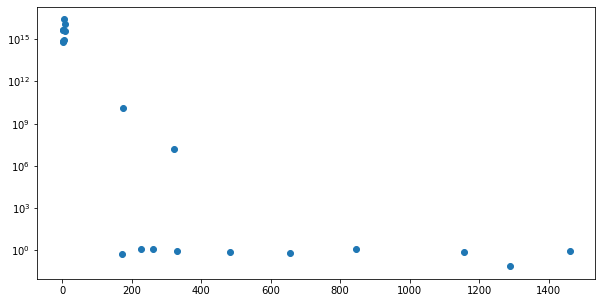

In [99]:
errs = aptr_ptrs[good_both] - coptr_ptrs[good_both]
cols = set(coptr_ptrs.columns) & set(aptr_ptrs.columns)
errs = errs[cols]

fig = plt.figure(figsize=(10, 5))
plt.scatter(
    n_reads[good_both].reindex(errs.index)[cols].values.flatten(),
    np.abs(errs).values.flatten()
)
plt.yscale("log")
plt.ylim(np.abs(errs).values.min(), 1e17)
plt.xlabel("Number of reads used")
plt.ylabel("Error in PTR")
plt.title("Error in PTR vs. number of reads used")

In [96]:
np.abs(errs).min().min()

0.06984025432627772